## k-NN Algorithm

In [16]:
import pandas as pd
import numpy as np
import os
import statistics
from statistics import mode
import matplotlib.pyplot as plt
import scipy.io 
os.chdir('C:\\Users\\adala\\Downloads')

In [17]:
os.chdir('C:\\Users\\adala\\Downloads')

train = pd.read_csv('train.csv', index_col = 'Unnamed: 0')
y = pd.read_csv('train_answers.csv', index_col = 'Unnamed: 0')
test = pd.read_csv('test.csv', index_col = 'Unnamed: 0')
answers = pd.read_csv('real_answers_for_test.csv', index_col = 'Unnamed: 0')

In [18]:
print(f'Shape of train DF is {train.shape}')
print(f'Shape of y DF is {y.shape}')
print(f'Shape of test DF is {test.shape}')
print(f'Shape of answers DF is {answers.shape}')

Shape of train DF is (426, 31)
Shape of y DF is (426, 1)
Shape of test DF is (143, 31)
Shape of answers DF is (143, 1)


In [19]:
mainLst=[]
for i in range(len(test)):
    distLst = []
    for j in range(len(train)):
        distance = np.linalg.norm(test.iloc[i] - train.iloc[j])
        distLst.append(distance)
    mainLst.append(distLst)

In [20]:
def prediction(lst, k):
    predictions_new = []
    for i in lst:
        check = []
        nearest_dist = np.sort(i)[:k]
        for j in nearest_dist:
            check.append(y['Diagnosis'].iloc[i.index(j)])
        predictions_new.append(check)
    get = []
    for i in predictions_new:
        get.append(mode(i))
    return get

In [21]:
k1 = prediction(mainLst, 1)
k3 = prediction(mainLst, 3)
k5 = prediction(mainLst, 5)
k6 = prediction(mainLst, 6)
k7 = prediction(mainLst, 7)
k9 = prediction(mainLst, 9)

In [22]:
new_lst = []
for i in answers.values.tolist():
    for j in i:
        new_lst.append(j)

In [23]:
k_neigboers = [k1, k3, k5, k7, k9]
accuracy = []

for lst in k_neigboers:
    counter = 0
    for i, j in zip(new_lst, lst):
        if i == j:
            counter +=1
    accuracy.append(counter/len(new_lst))

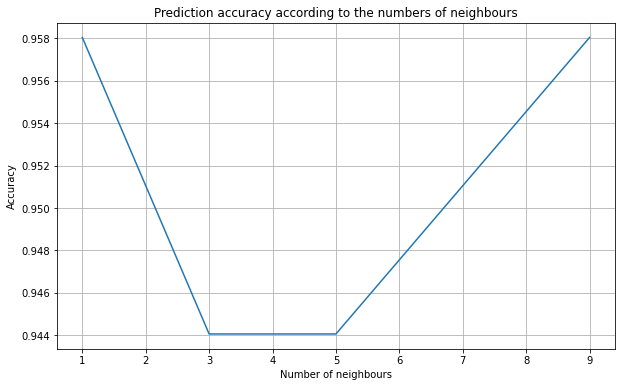

In [31]:
plt.figure(figsize = (10, 6))
plt.plot([1, 3, 5, 7, 9], accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.title('Prediction accuracy according to the numbers of neighbours')
plt.grid()
plt.show();

## k-means Algorithm

In [25]:
data = scipy.io.loadmat('ex7data2.mat')
X = data['X']
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [26]:
def findClosestCentroids(X, centroids):
    distance_list = []
    for i in range(len(centroids)):
        distance_fill = []
        for j in range(len(X)):
            distance = np.linalg.norm(centroids[i] - X[j])
            distance_fill.append(distance)
        distance_list.append(distance_fill)
    new_s = [p for p in zip(*distance_list)]
    idx = []
    for i in new_s:
        idx.append(i.index(min(i)))
    return idx

In [27]:
def computeCentroids(X, idx, K):
    datalists = dict()
    for item in range(0, K):
        datalists[item] = []
    for i, j in zip(idx, X):
        for a, b in datalists.items():
            if i == 0 and a == 0:
                datalists[a].append(j)
            elif i ==1 and a == 1:
                datalists[a].append(j)
            elif i == 2 and a == 2:
                datalists[a].append(j)
    centroid = []
    for i in list(datalists.values()):
        i = [sum(list(i))/len(i) for i in zip(*list(i))]
        centroid.append(i)
    return centroid

In [28]:
centroids = initial_centroids.copy()
for i in range(max_iters):
    idx = findClosestCentroids(X, centroids)
    centroids = computeCentroids(X, idx, 3)
centroids

[[1.9539946648593873, 5.025570059426876],
 [3.0436711927398137, 1.0154104079486552],
 [6.033667356017604, 3.0005251118352563]]

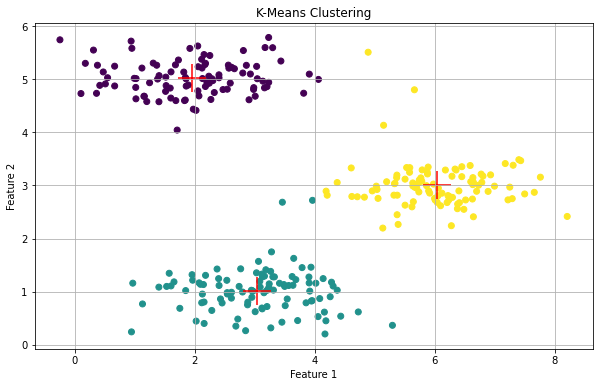

In [29]:
plt.figure(figsize = (10, 6))
plt.scatter(X[:,0], X[:, 1], c = idx)
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], marker = '+', s = 800, c = 'red')
plt.grid()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show();